In [2]:
from keras.datasets import mnist

Using TensorFlow backend.
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mmsub\Anaconda3\envs\learn

In [3]:
training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set

In [4]:
from matplotlib import pyplot as plt

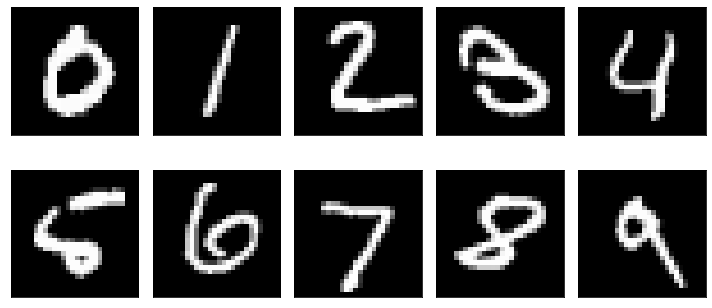

In [5]:
fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,figsize=(10,5))

for idx, ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]):
    for i in range(1000):
        if y_test[i] ==idx:
            ax.imshow(X_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break
plt.tight_layout()
plt.show()

In [6]:
from keras import Sequential

model = Sequential()

In [7]:
from keras.layers import Dense

hidden_layer_size = 1
model.add(Dense(units=hidden_layer_size,input_shape=(784,),activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.add(Dense(units=784,activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_2 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
def create_basic_autoencoder(hidden_layer_size):
    model = Sequential()
    model.add(Dense(units=hidden_layer_size,input_shape=(784,),activation = 'relu'))
    model.add(Dense(units=784,activation = 'sigmoid'))
    return model

In [11]:
model = create_basic_autoencoder(hidden_layer_size=1)

In [12]:
X_train_reshaped = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [13]:
X_train_reshaped = X_train_reshaped/255.
X_test_reshaped = X_test_reshaped/255.

In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
model.fit(X_train_reshaped,X_train_reshaped,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0884
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0650
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0639
Epoch 4/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0634
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0631
Epoch 6/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0629
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0626
Epoch 8/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0621
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0617
Epoch 10/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0614


In [16]:
output = model.predict(X_test_reshaped)

In [17]:
import random

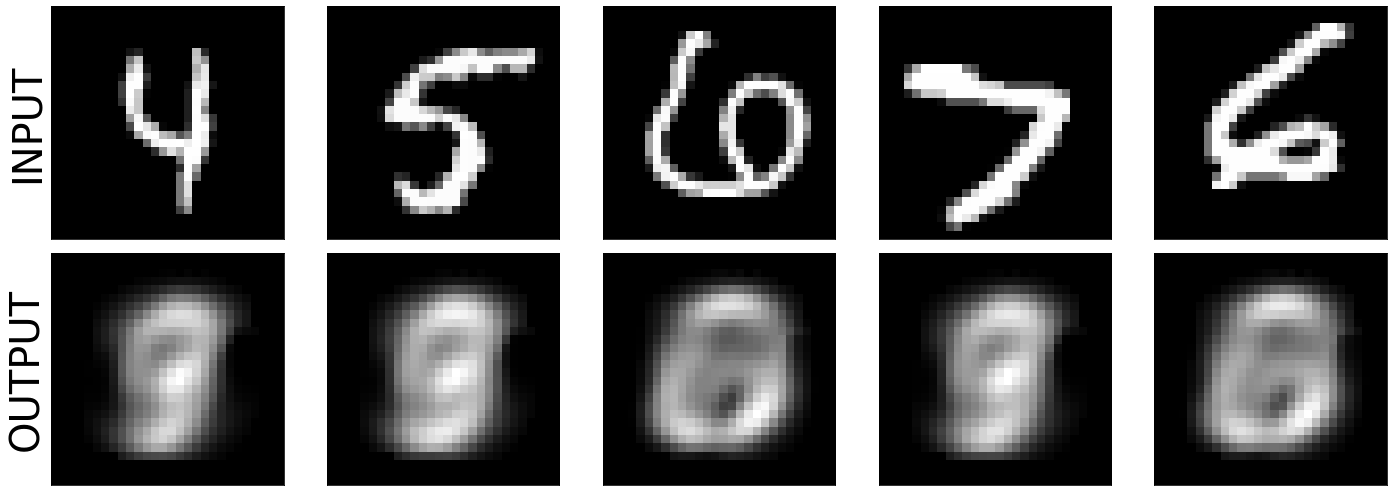

In [18]:
fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,figsize=(20,7))

randomly_selected_imgs = random.sample(range(output.shape[0]),5)

for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test[randomly_selected_imgs[i]], cmap='gray')
    if i==0:
        ax.set_ylabel("INPUT",size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i==0:
        ax.set_ylabel("OUTPUT",size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [19]:
hiddenLayerSize_2_model = create_basic_autoencoder(hidden_layer_size=2)
hiddenLayerSize_4_model = create_basic_autoencoder(hidden_layer_size=4)
hiddenLayerSize_8_model = create_basic_autoencoder(hidden_layer_size=8)
hiddenLayerSize_16_model = create_basic_autoencoder(hidden_layer_size=16)
hiddenLayerSize_32_model = create_basic_autoencoder(hidden_layer_size=32)

In [20]:
hiddenLayerSize_2_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_2_model.fit(X_train_reshaped,X_train_reshaped,epochs=10,verbose=0)

In [21]:
hiddenLayerSize_4_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_4_model.fit(X_train_reshaped,X_train_reshaped,epochs=10,verbose=0)

In [22]:
hiddenLayerSize_8_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_8_model.fit(X_train_reshaped,X_train_reshaped,epochs=10,verbose=0)

In [23]:
hiddenLayerSize_16_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_16_model.fit(X_train_reshaped,X_train_reshaped,epochs=10,verbose=0)

In [24]:
hiddenLayerSize_32_model.compile(optimizer='adam',loss='mean_squared_error')
hiddenLayerSize_32_model.fit(X_train_reshaped,X_train_reshaped,epochs=10,verbose=0)

In [25]:
output_2_model = hiddenLayerSize_2_model.predict(X_test_reshaped)
output_4_model = hiddenLayerSize_4_model.predict(X_test_reshaped)
output_8_model = hiddenLayerSize_8_model.predict(X_test_reshaped)
output_16_model = hiddenLayerSize_16_model.predict(X_test_reshaped)
output_32_model = hiddenLayerSize_32_model.predict(X_test_reshaped)

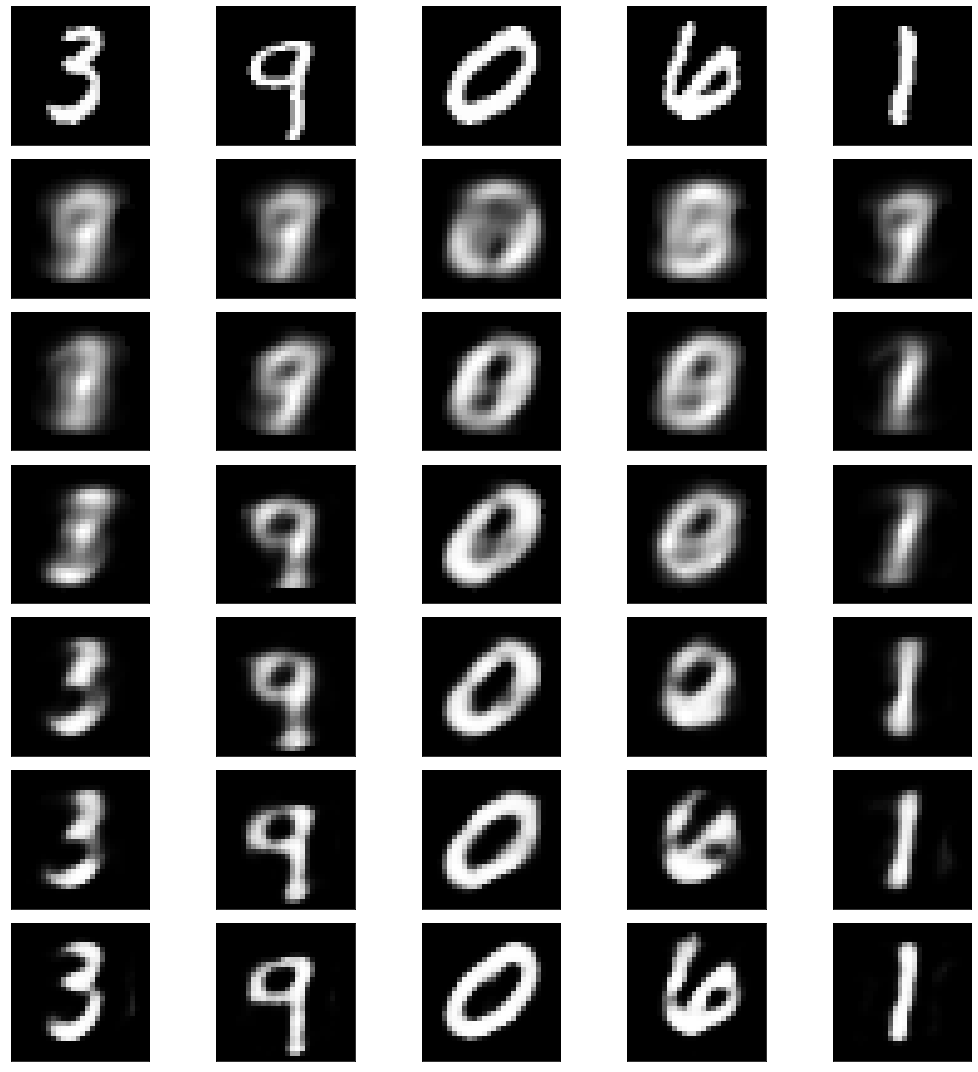

In [26]:
fig, axes = plt.subplots(7,5,figsize=(15,15))

randomly_selected_imgs = random.sample(range(output.shape[0]),5)
outputs = [X_test, output, output_2_model,output_4_model,output_8_model,output_16_model,output_32_model]

for row_num, row in enumerate(axes):
    for col_num, ax in enumerate(row):
        ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28,28),cmap = 'gray')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
plt.tight_layout()
plt.show()

In [27]:
import numpy as np

In [28]:
X_train_noisy = X_train_reshaped + np.random.normal(0,0.5,size = X_train_reshaped.shape)
X_test_noisy = X_test_reshaped + np.random.normal(0,0.5,size = X_test_reshaped.shape)

In [29]:
X_train_noisy = np.clip(X_train_noisy, a_min=0, a_max=1)
X_test_noisy = np.clip(X_test_noisy, a_min=0, a_max=1)

In [30]:
basic_denoise_autoencoder = create_basic_autoencoder(hidden_layer_size=16)

In [31]:
basic_denoise_autoencoder.compile(optimizer='adam',loss='mean_squared_error')
basic_denoise_autoencoder.fit(X_train_noisy, X_train_reshaped,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0505
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0341
Epoch 3/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0324
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0320
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0318
Epoch 6/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0316
Epoch 7/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0315
Epoch 8/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0313
Epoch 9/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0312
Epoch 10/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0311


In [32]:
output =basic_denoise_autoencoder.predict(X_test_noisy)

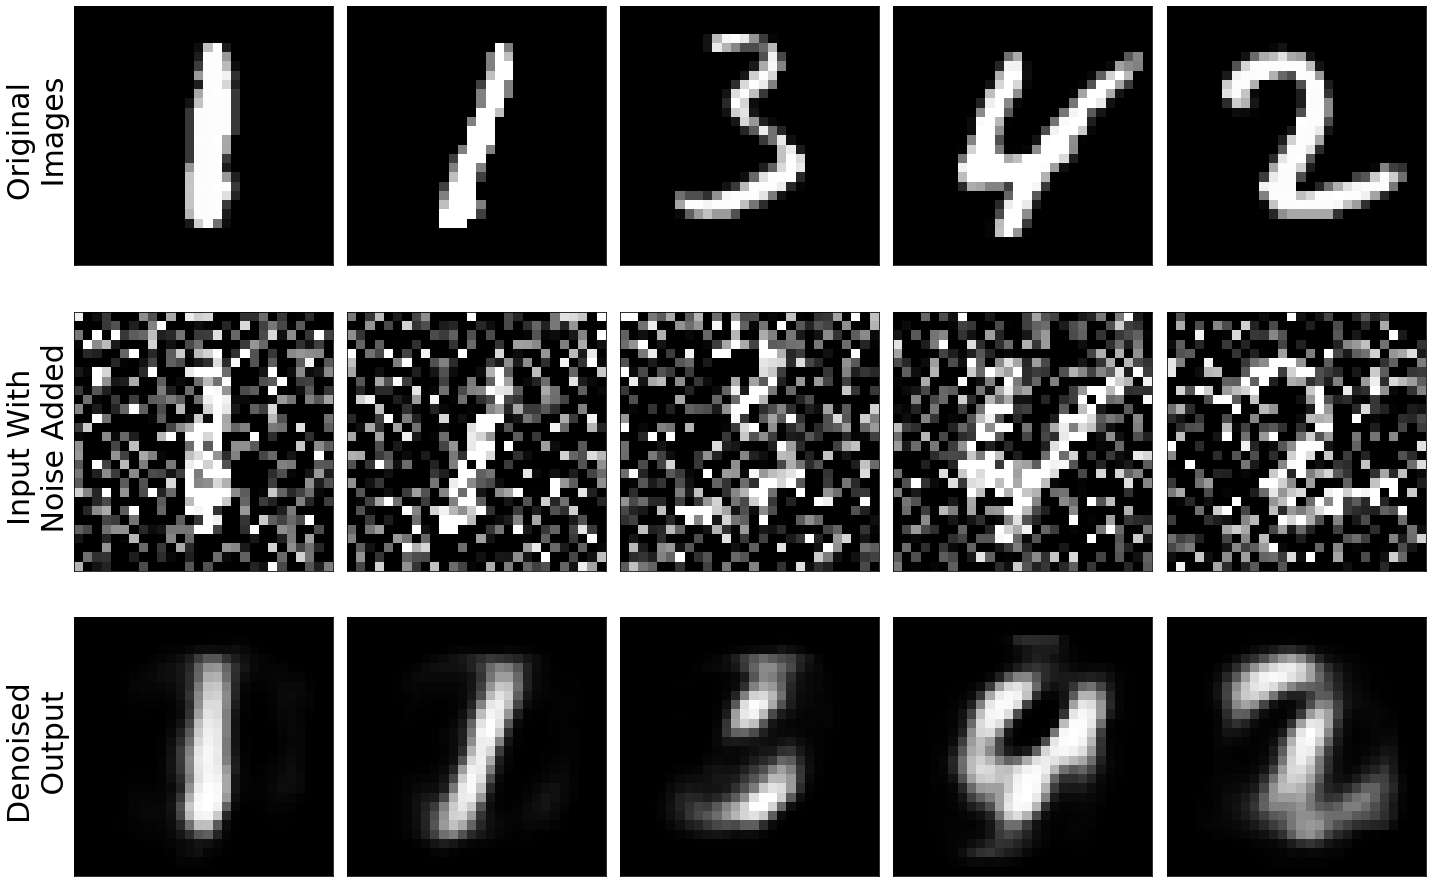

In [33]:
fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5,figsize=(20,13))

randomly_selected_imgs = random.sample(range(output.shape[0]),5)

for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i==0:
        ax.set_ylabel("Original \n Images",size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i==0:
        ax.set_ylabel("Input With \n Noise Added",size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i==0:
        ax.set_ylabel("Denoised \n Output",size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [40]:
conv_autoencoder = Sequential()

In [41]:
from keras.layers import Conv2D

In [42]:
conv_autoencoder.add(Conv2D(filters=16,kernel_size=(3,3),activation = 'relu',padding='same',input_shape=(28,28,1)))
conv_autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),activation = 'relu',padding='same'))

In [43]:
conv_autoencoder.add(Conv2D(filters=8,kernel_size=(3,3),activation = 'relu',padding='same'))
conv_autoencoder.add(Conv2D(filters=16,kernel_size=(3,3),activation = 'relu',padding='same'))

In [44]:
conv_autoencoder.add(Conv2D(filters=1,kernel_size=(3,3),activation = 'sigmoid',padding='same'))

In [45]:
conv_autoencoder.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [47]:
conv_autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy.reshape(60000,28,28,1),X_train_reshaped.reshape(60000,28,28,1),epochs=10)

Epoch 1/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.1206
Epoch 2/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.1028
Epoch 3/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1012
Epoch 4/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.1002
Epoch 5/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0993
Epoch 6/10
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0986
Epoch 7/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0983
Epoch 8/10
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0979
Epoch 9/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0978
Epoch 10/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0975


In [48]:
output = conv_autoencoder.predict(X_test_noisy.reshape(10000,28,28,1))

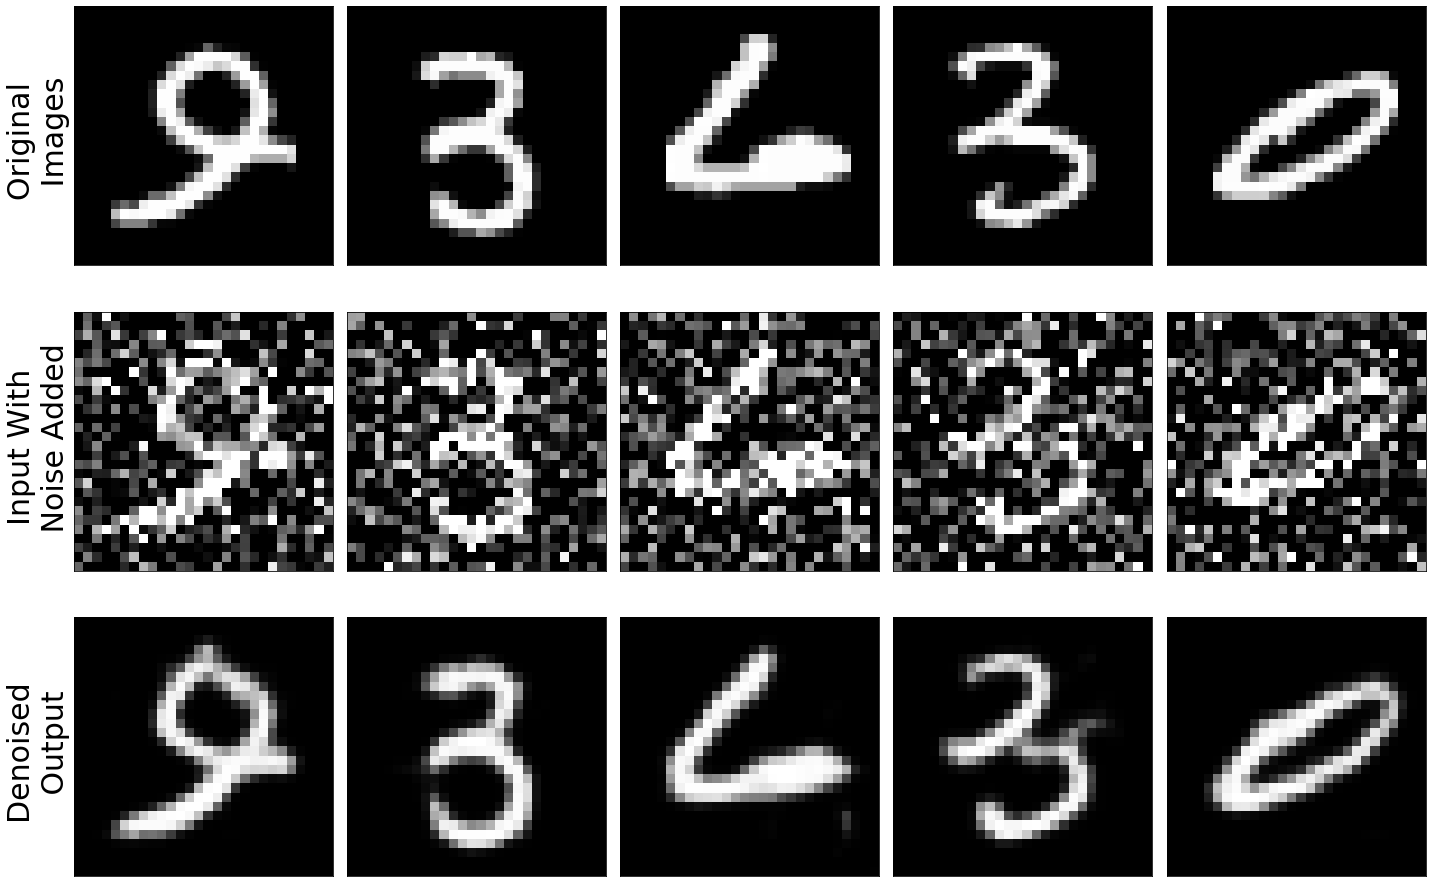

In [49]:
fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5,figsize=(20,13))

randomly_selected_imgs = random.sample(range(output.shape[0]),5)

for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i==0:
        ax.set_ylabel("Original \n Images",size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i==0:
        ax.set_ylabel("Input With \n Noise Added",size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i==0:
        ax.set_ylabel("Denoised \n Output",size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()